In [1]:
#importing required libraries
import os
import numpy as np
import pandas as pd
import sklearn
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###Installing data###

In [3]:
df = pd.read_csv('car data.csv')

In [4]:
##Exploratory data analysis

In [5]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Seller_Type'].unique())

['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
['Dealer' 'Individual']


In [8]:
##Checking null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
#Removing car_name feature
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
#creating new feature number of years, which is directly related to the selling price of car
final_dataset['Current_Year'] = 2021

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [15]:
final_dataset['No_years'] = final_dataset['Current_Year'] - final_dataset['Year']

In [16]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [17]:
##Deleting features which are not required for the model
final_dataset.drop(['Year'],axis=1,inplace=True)

In [18]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [19]:
###Converting categorical features into mathematical features using one hot encoding###
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [21]:
#Creating dependent and Independent variable
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [22]:
X.head()

,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [23]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
##decision tree regressor starts##

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [37]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Regressor Score in percentage is : ", dt.score(X_test, y_test)*100)
print("Mean squared error : ", mse(y_pred, y_test))

Decision Tree Regressor Score in percentage is :  94.83452200674488
Mean squared error :  1.1206081967213117


In [38]:
#####Hyperparameter tuning##

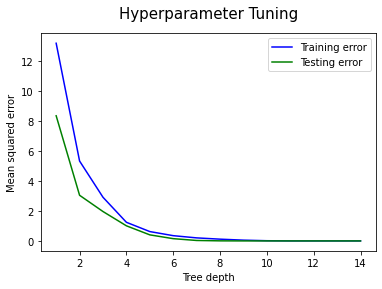

In [30]:
####Hyperparameter tuning#######
max_depths = range(1, 15)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train, y_train)
    training_error.append(mse(y_train, model_1.predict(X_train)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_test, y_test)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

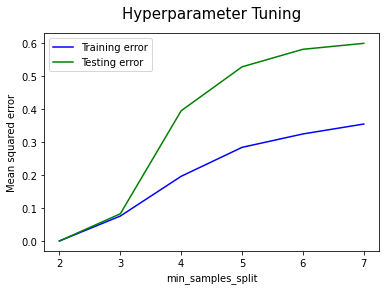

In [32]:
samples = range(2,8)
training_error = []
for sample in samples:
    model_1 = DecisionTreeRegressor(max_depth=13,min_samples_split = sample)
    model_1.fit(X_train, y_train)
    training_error.append(mse(y_train, model_1.predict(X_train)))
    
testing_error = []
for sample in samples:
    model_2 = DecisionTreeRegressor(max_depth=13,min_samples_split = sample)
    model_2.fit(X_test, y_test)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(samples, training_error, color='blue', label='Training error')
plt.plot(samples, testing_error, color='green', label='Testing error')
plt.xlabel('min_samples_split')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [54]:
new_model = DecisionTreeRegressor(max_depth=10,
                                  min_samples_split=3)
#or new_model = gs.best_estimator_
new_model.fit(X_train, y_train)
y_pred = new_model.predict(X_test)
print("Decision Tree Regressor Score in percentage is : ", new_model.score(X_test, y_test)*100)
print("Mean squared error : ", mse(y_pred, y_test))

Decision Tree Regressor Score in percentage is :  96.12213734029136
Mean squared error :  0.8412705828779603


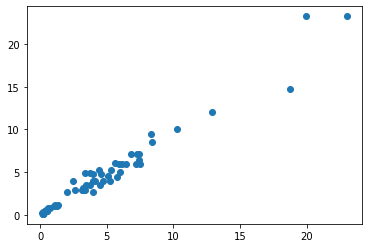

In [59]:
#testing our model#
plt.scatter(y_test, y_pred)

In [45]:
import pickle                

In [61]:
pickling_on = open("model.pickle","wb")
pickle.dump(new_model, pickling_on)
pickling_on.close()